In [1]:
# Install dependencies
!pip install -U torch torchvision torchaudio
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

# Install Detectron2
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:

# Install Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'




  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-7p3y4eh4
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-7p3y4eh4
  Resolved https://github.com/facebookresearch/detectron2.git to commit 79f914785a87b80565381f4489b129e633c4efb5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import các module của Detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

print("Detectron2 is successfully installed and imported!")


2.3.0+cu121 True
Detectron2 is successfully installed and imported!


In [4]:
from google.colab import files

# Tải tệp zip lên từ máy tính cá nhân
uploaded = files.upload()


Saving wb_localization_dataset.zip to wb_localization_dataset.zip


In [5]:
import zipfile
import os

# Giải nén tệp zip vừa tải lên
zip_path = 'wb_localization_dataset.zip'
extract_dir = 'dataset'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed.")


Extraction completed.


In [6]:
# Liệt kê các tệp trong thư mục dataset
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))


dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-024.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-014.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-012.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-025.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0140-01-008.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0140-01-007.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-031.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-007.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0140-01-006.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-043.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0137-01-020.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0140-01-003.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0174-03-003.jpg
dataset/wb_localization_dataset/images/train/nlvnpf-0174-03-001.jpg
dataset/wb_localization_dataset/images/train/nlv

In [15]:

 for d in ["train", "val"]:
    DatasetCatalog.register(f"wb_localization_{d}", lambda d=d: get_my_dataset_dicts(
        img_train_dir if d == "train" else img_val_dir,
        ann_train_dir if d == "train" else ann_val_dir))
    MetadataCatalog.get(f"wb_localization_{d}").set(thing_classes=["class1", "class2", "class3"])

[05/22 07:59:13 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:00, 233MB/s]                           


[05/22 07:59:15 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[05/22 07:59:28 d2.utils.events]:  eta: 0:00:14  iter: 19  total_loss: 2.376  loss_cls: 1.016  loss_box_reg: 0.5239  loss_rpn_cls: 0.4873  loss_rpn_loc: 0.355    time: 0.5025  last_time: 0.4968  data_time: 0.0253  last_data_time: 0.0058   lr: 9.5155e-05  max_mem: 4023M
[05/22 07:59:43 d2.utils.events]:  eta: 0:00:04  iter: 39  total_loss: 1.066  loss_cls: 0.3479  loss_box_reg: 0.4554  loss_rpn_cls: 0.1134  loss_rpn_loc: 0.1824    time: 0.4791  last_time: 0.4512  data_time: 0.0086  last_data_time: 0.0056   lr: 0.00019506  max_mem: 4023M
[05/22 07:59:49 d2.utils.events]:  eta: 0:00:00  iter: 49  total_loss: 0.9154  loss_cls: 0.2616  loss_box_reg: 0.4223  loss_rpn_cls: 0.06509  loss_rpn_loc: 0.1439    time: 0.4812  last_time: 0.4793  data_time: 0.0101  last_data_time: 0.0156   lr: 0.00024501  max_mem: 4023M
[05/22 07:59:50 d2.engine.hooks]: Overall training speed: 48 iterations in 0:00:23 (0.4812 s / it)
[05/22 07:59:50 d2.engine.hooks]: Total training time: 0:00:30 (0:00:07 on hooks)
[05

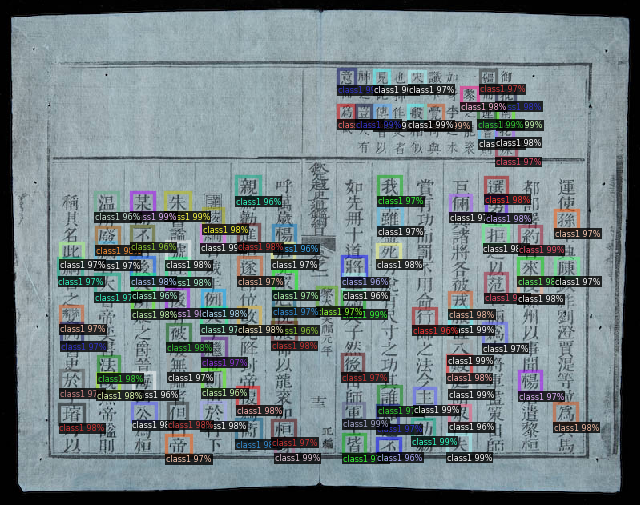

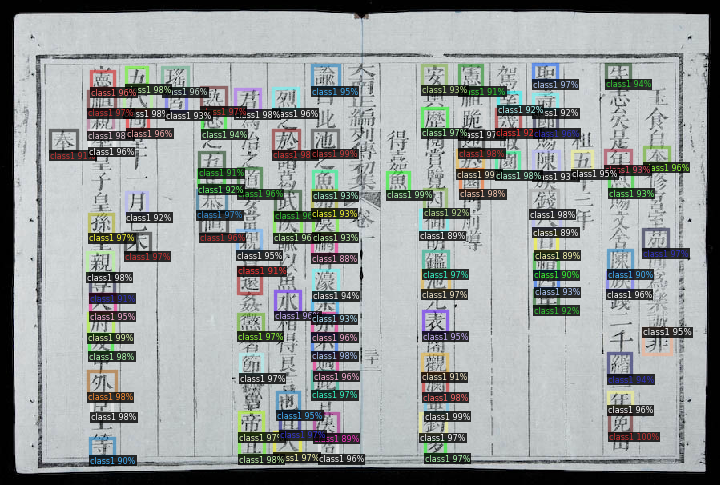

In [16]:
import os
import json
import cv2
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
import random

# Hàm chuyển đổi bounding box từ định dạng YOLO sang định dạng Detectron2
def yolo_to_detectron2(bbox, img_width, img_height):
    x_center, y_center, width, height = bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    return [x_min, y_min, width, height]

# Hàm để đọc và chuyển đổi dữ liệu từ YOLO sang định dạng Detectron2
def get_my_dataset_dicts(img_dir, ann_dir):
    dataset_dicts = []
    for idx, img_file in enumerate(os.listdir(img_dir)):
        record = {}

        filename = os.path.join(img_dir, img_file)
        record["file_name"] = filename
        record["image_id"] = idx

        img_height, img_width = cv2.imread(filename).shape[:2]
        record["height"] = img_height
        record["width"] = img_width

        ann_file = os.path.join(ann_dir, os.path.splitext(img_file)[0] + '.txt')
        with open(ann_file, 'r') as f:
            lines = f.readlines()

        objs = []
        for line in lines:
            category_id, x_center, y_center, width, height = map(float, line.split())
            category_id = int(category_id)
            bbox = yolo_to_detectron2((x_center, y_center, width, height), img_width, img_height)
            obj = {
                "bbox": bbox,
                "bbox_mode": BoxMode.XYWH_ABS,
                "category_id": category_id,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

# Hàm chuyển giá trị Pascal_Voc bb thành Yolo
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

# Đường dẫn tới thư mục chứa ảnh và nhãn của bạn
img_train_dir = "dataset/wb_localization_dataset/images/train"
ann_train_dir = "dataset/wb_localization_dataset/labels/train"
img_val_dir = "dataset/wb_localization_dataset/images/val"
ann_val_dir = "dataset/wb_localization_dataset/labels/val"

# Đăng ký tập dữ liệu
# for d in ["train", "val"]:
#    DatasetCatalog.register(f"wb_localization_{d}", lambda d=d: get_my_dataset_dicts(
#        img_train_dir if d == "train" else img_val_dir,
#        ann_train_dir if d == "train" else ann_val_dir))
#    MetadataCatalog.get(f"wb_localization_{d}").set(thing_classes=["class1", "class2", "class3"]) 

# Cấu hình mô hình và huấn luyện
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("wb_localization_train",)
cfg.DATASETS.TEST = ("wb_localization_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 50
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.DEVICE = "cuda"  # Sử dụng GPU

# Đảm bảo rằng thư mục OUTPUT_DIR tồn tại
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# Đường dẫn tới file mô hình đã huấn luyện
model_weights_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
assert os.path.exists(model_weights_path), f"Checkpoint {model_weights_path} not found!"

# Chạy mô hình
cfg.MODEL.WEIGHTS = model_weights_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cuda"  # Sử dụng GPU
predictor = DefaultPredictor(cfg)

metadata = MetadataCatalog.get("wb_localization_val")
dataset_dicts = get_my_dataset_dicts(img_val_dir, ann_val_dir)
for d in random.sample(dataset_dicts, 2):
# for d in dataset_dicts:
    im = cv2.imread(d["file_name"])
    img_height, img_width = im.shape[:2]
    outputs = predictor(im)
    # Ghi kết quả ra file
    output_boxes = outputs["instances"].pred_boxes
    output_scores = outputs["instances"].scores
    box_list = output_boxes.tensor.cpu()
    box_list = box_list.numpy()
    score_list = output_scores.cpu()
    score_list = score_list.numpy()
    result = []
    for i in range(len(box_list)):
      temp_res = [0]
      x1, y1, x2, y2 = box_list[i]
      new_box = pascal_voc_to_yolo(x1, y1, x2, y2, img_width, img_height)
      x_cen, y_cen, w, h = new_box
      temp_res.append(x_cen)
      temp_res.append(y_cen)
      temp_res.append(w)
      temp_res.append(h)
      temp_res.append(score_list[i])
      result.append(temp_res)
    with open('output/res.txt', 'w+') as f:
      for res in result:
          f.write('%s\n' %res)
    f.close()
    # Trực quan hóa bằng hình ảnh
    # v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.8)
    v = Visualizer(im, metadata=metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])
    # cv2_imshow(v.get_image())
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Create a COCOEvaluator for bounding box evaluation
evaluator = COCOEvaluator("wb_localization_val", output_dir="./output")

# Build the test data loader
val_loader = build_detection_test_loader(cfg, "wb_localization_val")

# Perform inference and evaluation
results = inference_on_dataset(predictor.model, val_loader, evaluator)

# Print evaluation results
print(results)